In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math  # Import math module to use math.ceil()
from windrose import WindroseAxes
import seaborn as sns

In [23]:
df = pd.read_csv('baka.csv')

/var/folders/zk/rs9ym1ps2218f736g3l9fb9w0000gn/T/ipykernel_18935/4079001144.py:1: DtypeWarning: Columns (2,11,12,16,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('baka.csv')


In [24]:
df.head()

,created_at,timestamp,static_updated_at,position_updated_at,mmsi,latitude,longitude,speed,course,heading,...,flag,draught,ship_type_code,ship_type,length,width,eta,destination,status,collection_type
0,2022-10-01 01:50:58.393855 UTC,2022-10-01 00:17:54 UTC,NaN,2022-10-01 00:17:54 UTC,5030206,-12.389332,130.630885,NaN,NaN,NaN,...,AU,NaN,NaN,NaN,NaN,NaN,2022-10-01 00:17:52 UTC,NaN,NaN,satellite
1,2022-10-01 00:46:52.543918 UTC,2022-10-01 00:20:01 UTC,NaN,2022-10-01 00:20:01 UTC,5030206,-12.389332,130.630885,NaN,NaN,NaN,...,AU,NaN,NaN,NaN,NaN,NaN,2022-10-01 00:20:02 UTC,NaN,NaN,satellite
2,2022-10-01 01:09:09.220829 UTC,2022-10-01 00:25:24 UTC,NaN,2022-10-01 00:25:24 UTC,5030206,-12.389332,130.630885,NaN,NaN,NaN,...,AU,NaN,NaN,NaN,NaN,NaN,2022-10-01 00:25:22 UTC,NaN,NaN,satellite
3,2022-10-01 03:42:49.885093 UTC,2022-10-01 00:34:43 UTC,NaN,2022-10-01 00:34:43 UTC,5030206,-12.389332,130.630885,NaN,NaN,NaN,...,AU,NaN,NaN,NaN,NaN,NaN,2022-10-01 00:34:42 UTC,NaN,NaN,satellite
4,2022-10-02 16:12:35.62265 UTC,2022-10-01 00:39:17 UTC,NaN,2022-10-01 00:39:17 UTC,5030206,-12.389332,130.630885,NaN,NaN,NaN,...,AU,NaN,NaN,NaN,NaN,NaN,2022-10-01 00:39:12 UTC,NaN,NaN,satellite


In [25]:
print(df.columns.tolist())

['created_at', 'timestamp', 'static_updated_at', 'position_updated_at', 'mmsi', 'latitude', 'longitude', 'speed', 'course', 'heading', 'imo', 'name', 'call_sign', 'flag', 'draught', 'ship_type_code', 'ship_type', 'length', 'width', 'eta', 'destination', 'status', 'collection_type']


In [26]:
# Filter out rows where speed is zero
df_cleaned = df[df['speed'] > 0]

# Determine the appropriate maximum speed for plotting (e.g., rounded up to the nearest multiple of 10)
max_speed = np.ceil(df_cleaned['speed'].max() / 10) * 10
max_speed

110.0

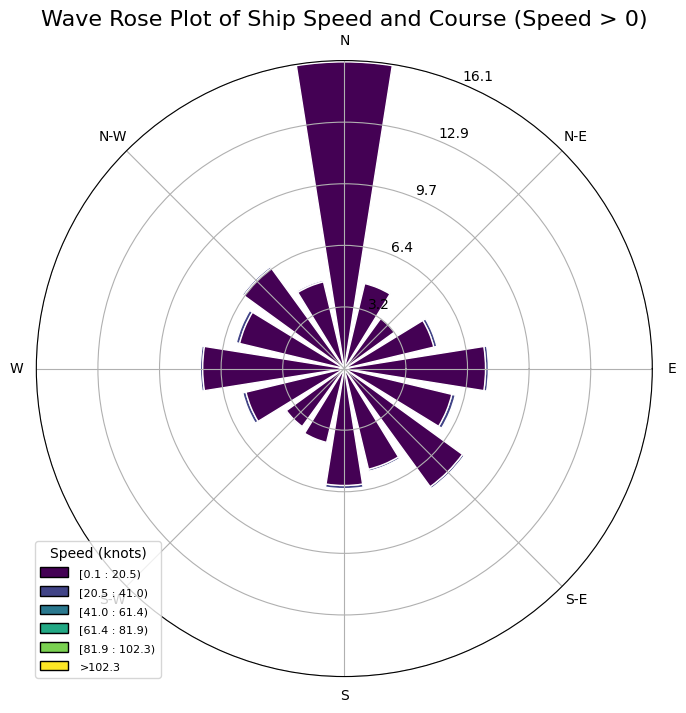

In [27]:
# # Sample ship data (replace this with your actual DataFrame containing 'speed' and 'course' columns)
# data = {
#     'speed': np.random.randint(1, 20, 100),  # Example ship speeds (1-20 knots)
#     # Example ship courses (0-359 degrees)
#     'course': np.random.randint(0, 360, 100)
# }
# df = pd.DataFrame(data)

# Filter out rows where speed is zero
df_cleaned = df[df['speed'] > 0]

# Plotting the wind rose (wave rose) graph with cleaned data
if not df_cleaned.empty:
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='windrose')

    # Create the wind rose plot with ship speed as the variable and ship course as the direction
    ax.bar(df_cleaned['course'], df_cleaned['speed'],
           normed=True, opening=0.8, edgecolor='white')

    # Customize the wind rose plot
    ax.set_title(
        'Wave Rose Plot of Ship Speed and Course (Speed > 0)', fontsize=16)
    ax.set_legend(title='Speed (knots)')

    plt.show()
else:
    print("No data available with speed > 0 for plotting the wave rose.")

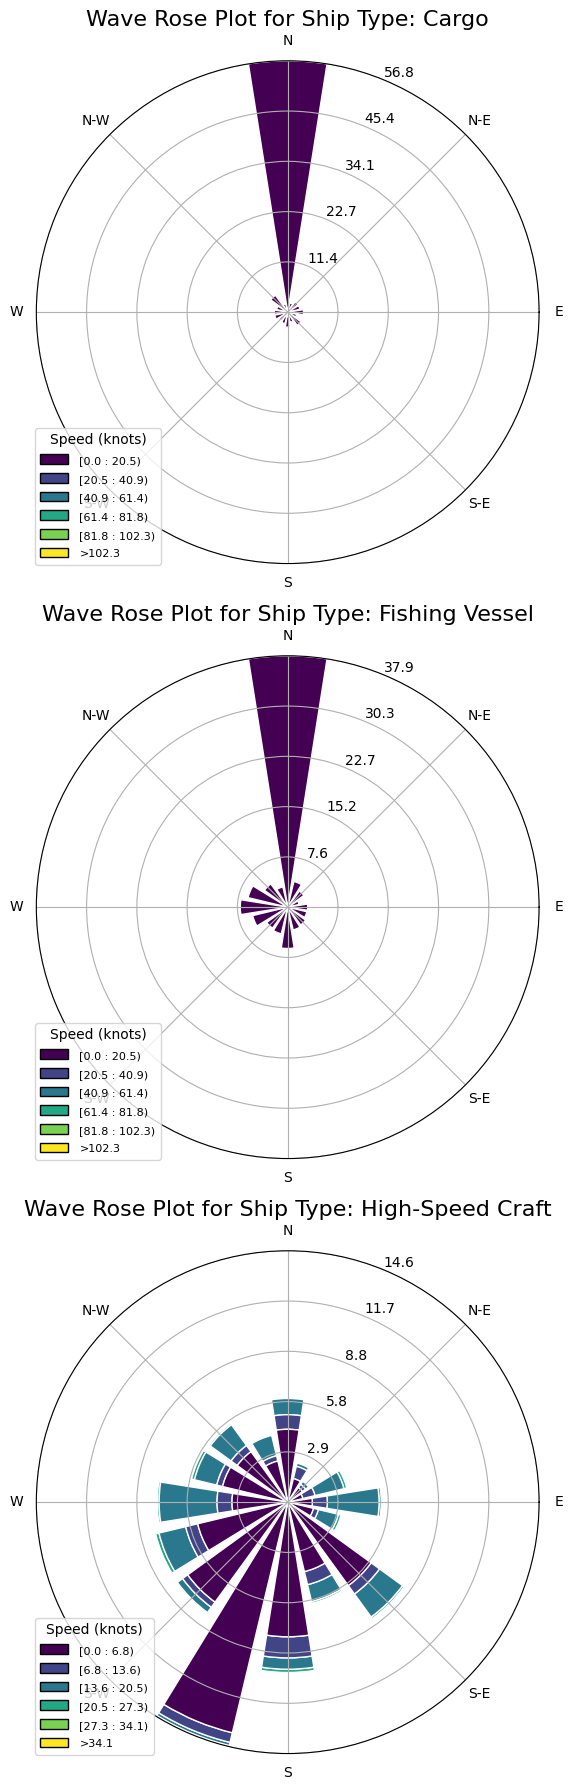

In [28]:
# # Sample ship data (replace this with your actual DataFrame containing 'speed', 'course', and 'ship_type' columns)
# data = {
#     'speed': np.random.randint(1, 20, 100),  # Example ship speeds (1-20 knots)
#     # Example ship courses (0-359 degrees)
#     'course': np.random.randint(0, 360, 100),
#     # Example ship types
#     'ship_type': np.random.choice(['Cargo', 'Tanker', 'Fishing', 'Passenger'], 100)
# }
# df = pd.DataFrame(data)

# Filter out rows with NaN ship types
df_filtered = df.dropna(subset=['ship_type', 'course', 'speed'])

# Get unique ship types from the filtered dataset
ship_types = df_filtered['ship_type'].unique()

# Create subplots for each ship type (excluding NaN ship types)
fig, axes = plt.subplots(nrows=len(ship_types), ncols=1, figsize=(
    8, 6 * len(ship_types)), subplot_kw=dict(projection='windrose'))

for i, ship_type in enumerate(ship_types):
    # Filter data for the current ship type
    subset = df_filtered[df_filtered['ship_type'] == ship_type]

    # Plotting the wind rose (wave rose) graph for the current ship type
    ax = axes[i] if len(ship_types) > 1 else axes  # Select the correct subplot
    ax.bar(subset['course'], subset['speed'],
           normed=True, opening=0.8, edgecolor='white')

    # Customize the wind rose plot for the current ship type
    ax.set_title(f'Wave Rose Plot for Ship Type: {ship_type}', fontsize=16)
    ax.set_legend(title='Speed (knots)')

# Adjust layout and spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

# Get unique ship types from the filtered dataset
ship_types = df_filtered['ship_type'].unique()

In [29]:
# Get unique ship types from the filtered dataset
ship_types = df_filtered['ship_type'].unique()
ship_types

array(['Cargo', 'Fishing Vessel', 'High-Speed Craft'], dtype=object)

In [30]:
# Drop duplicates based on 'mmsi'
df_unique = df.drop_duplicates(subset='mmsi')
ship_type_counts = df_unique['ship_type'].value_counts()


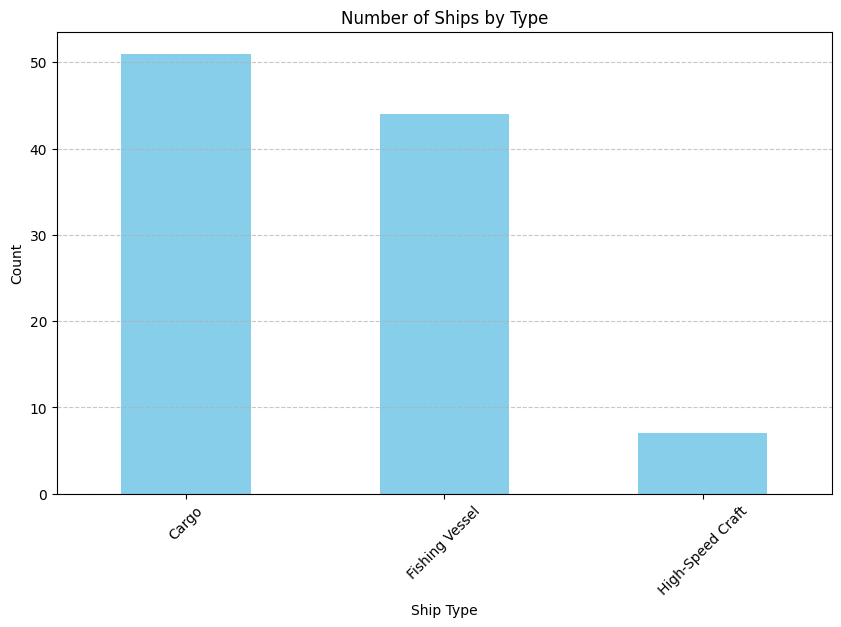

In [31]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
ship_type_counts.plot(kind='bar', color='skyblue')  # Plotting the bar chart
plt.title('Number of Ships by Type')  # Adding title to the plot
plt.xlabel('Ship Type')  # Adding label to the x-axis
plt.ylabel('Count')  # Adding label to the y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines
plt.show()  # Display the plot


In [32]:
destination_counts = df_unique['destination'].value_counts()

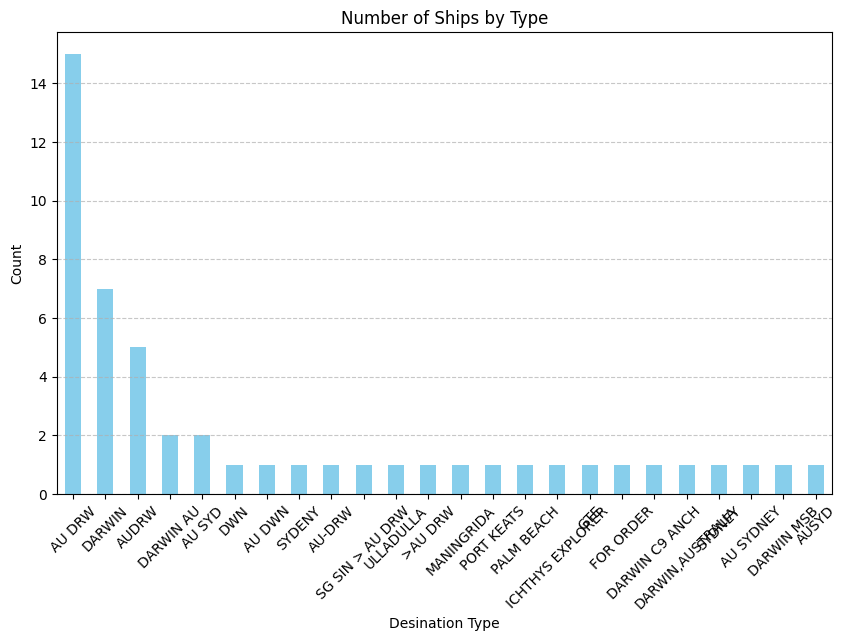

In [33]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
destination_counts.plot(kind='bar', color='skyblue')  # Plotting the bar chart
plt.title('Number of Ships by Type')  # Adding title to the plot
plt.xlabel('Desination Type')  # Adding label to the x-axis
plt.ylabel('Count')  # Adding label to the y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines
plt.show()  # Display the plot

In [34]:
# Filter out rows with non-zero vessel lengths
# Assuming 'df' is your DataFrame
# Drop duplicates based on 'mmsi' and keep non-zero 'length' values





/var/folders/zk/rs9ym1ps2218f736g3l9fb9w0000gn/T/ipykernel_18935/1401732606.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['length_bin'] = pd.cut(


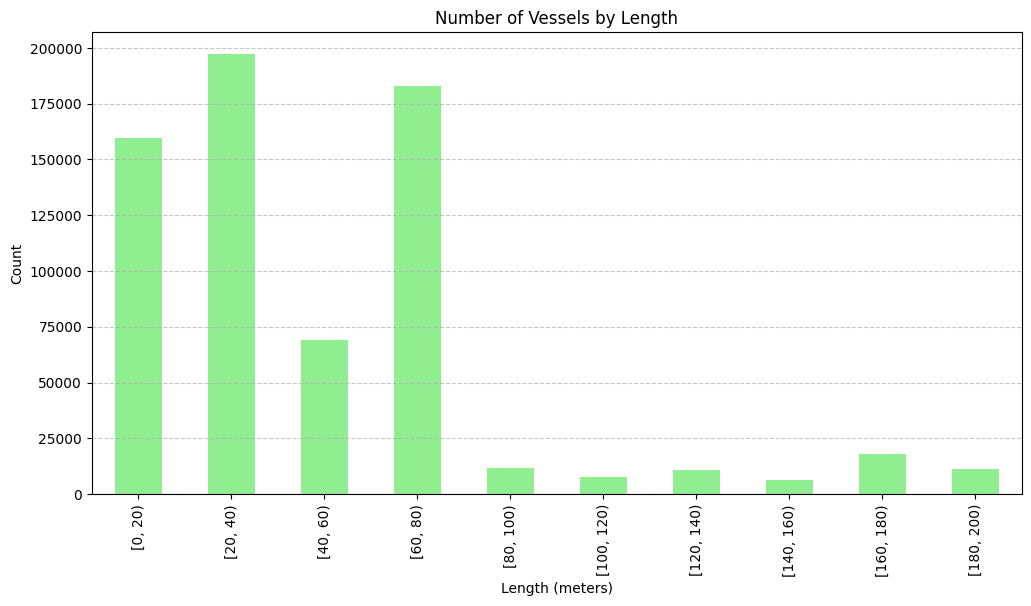

In [35]:
# Drop duplicates based on 'mmsi' and keep non-zero 'length' values
# Define the bins for grouping lengths
bins = list(range(0, 201, 20))  # Create bins from 0 to 200 in steps of 20

# Create a new column 'length_bin' that categorizes lengths into bins
df_filtered['length_bin'] = pd.cut(
    df_filtered['length'], bins=bins, right=False)

# Count the number of vessels in each length bin
length_bin_counts = df_filtered['length_bin'].value_counts().sort_index()


# Plotting the bar chart for vessel counts by length
plt.figure(figsize=(12, 6))  # Set the figure size (width, height)
length_bin_counts.plot(
    kind='bar', color='lightgreen')  # Plotting the bar chart
plt.title('Number of Vessels by Length')  # Adding title to the plot
plt.xlabel('Length (meters)')  # Adding label to the x-axis
plt.ylabel('Count')  # Adding label to the y-axis
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines
plt.show()  # Display the plot

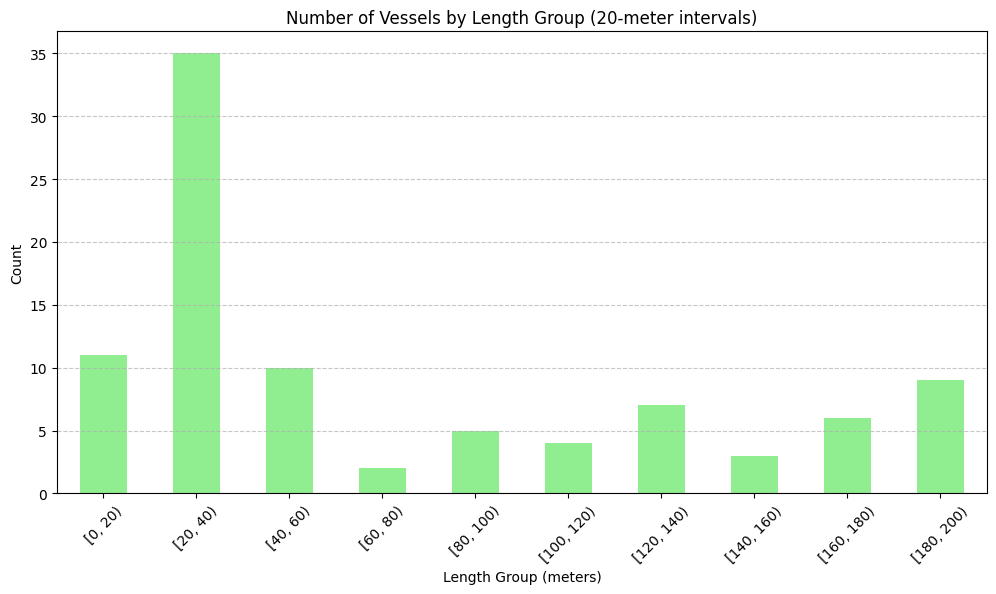

In [36]:
# Drop duplicates based on 'mmsi' and keep non-zero 'length' values
# data = {
#     'mmsi': [1, 2, 3, 4, 5, 6,7,8,9],
#     'length': [10, 25, 30, 35, 50, 55,120,130,90]
# }
# df = pd.DataFrame(data)
df_filtered = df.drop_duplicates(subset='mmsi').loc[df['length'] > 0]

# Calculate the maximum length and round it up to the nearest multiple of 20
max_length = df_filtered['length'].max()
max_length_rounded = math.ceil(max_length / 20) * 20

# Define the bin edges for grouping lengths
bin_edges = list(range(0, max_length_rounded + 20, 20))

# Create a new column in df_filtered that assigns each length to its corresponding bin
df_filtered['length_bin'] = pd.cut(
    df_filtered['length'], bins=bin_edges, right=False)

# Count the number of vessels in each length bin
length_bin_counts = df_filtered['length_bin'].value_counts().sort_index()

# Remove bins with zero count
length_bin_counts = length_bin_counts[length_bin_counts > 0]

# Plotting the bar chart for vessel counts by length bin
plt.figure(figsize=(12, 6))  # Set the figure size (width, height)
# Plotting the bar chart
length_bin_counts.plot(kind='bar', color='lightgreen')
# Adding title to the plot
plt.title('Number of Vessels by Length Group (20-meter intervals)')
plt.xlabel('Length Group (meters)')  # Adding label to the x-axis
plt.ylabel('Count')  # Adding label to the y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines
plt.show()  # Display the plot

In [37]:
# Grouping by ship_type and calculating mean speed
mean_speed_by_type = df.groupby('ship_type')['speed'].mean().sort_values(ascending=False)
mean_speed_by_type = mean_speed_by_type.sort_index()


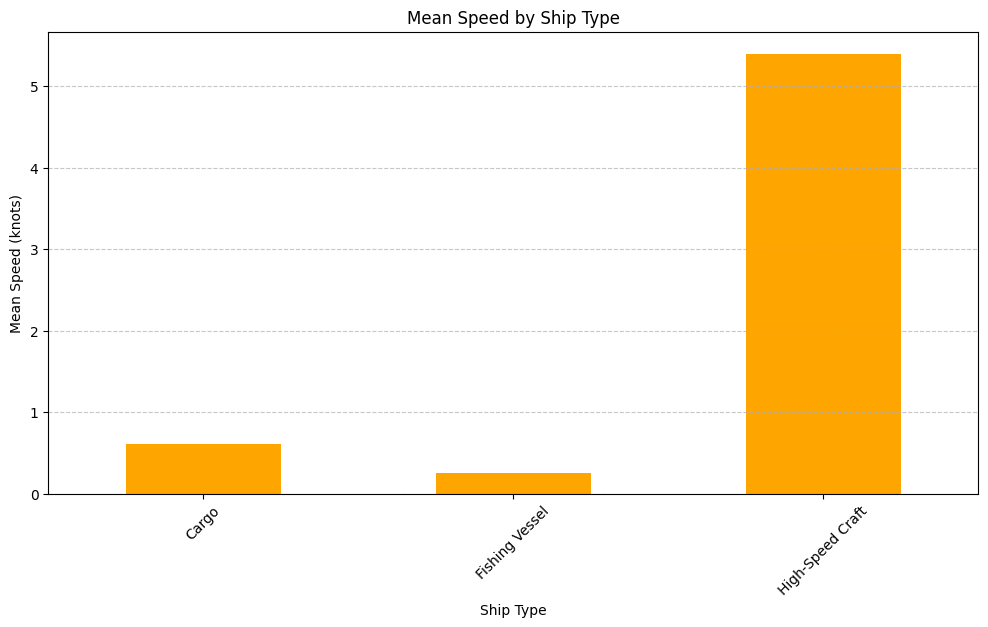

In [38]:
# Plotting the bar chart for mean speed by ship type
plt.figure(figsize=(12, 6))  # Set the figure size (width, height)
mean_speed_by_type.plot(kind='bar', color='orange')  # Plotting the bar chart
plt.title('Mean Speed by Ship Type')  # Adding title to the plot
plt.xlabel('Ship Type')  # Adding label to the x-axis
plt.ylabel('Mean Speed (knots)')  # Adding label to the y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines
plt.show()  # Display the plot


<Figure size 1200x600 with 0 Axes>

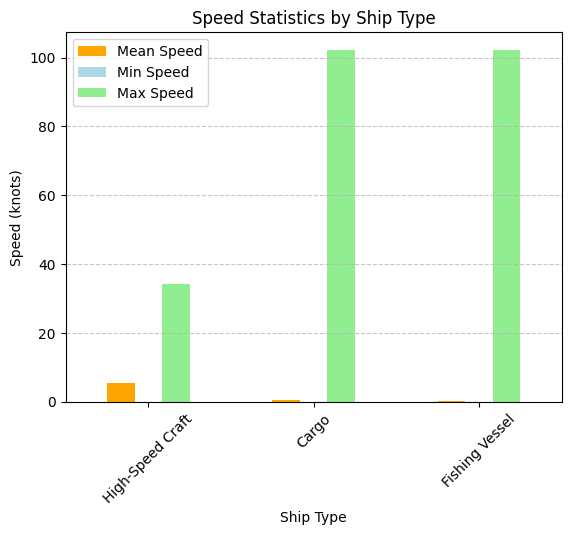

In [39]:
import matplotlib.pyplot as plt

# Grouping by ship_type and calculating mean, min, and max speeds
stats_by_type = df.groupby('ship_type')['speed'].agg(
    ['mean', 'min', 'max']).sort_values(by='mean', ascending=False)

# Plotting the bar chart for mean speed by ship type
plt.figure(figsize=(12, 6))  # Set the figure size (width, height)
# Plotting the bar chart
stats_by_type.plot(kind='bar', color=['orange', 'lightblue', 'lightgreen'])

plt.title('Speed Statistics by Ship Type')  # Adding title to the plot
plt.xlabel('Ship Type')  # Adding label to the x-axis
plt.ylabel('Speed (knots)')  # Adding label to the y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines
plt.legend(['Mean Speed', 'Min Speed', 'Max Speed'])  # Adding legend

plt.show()  # Display the plot

In [40]:
# Grouping by ship_type and calculating mean course
mean_course_by_type = df.groupby('ship_type')['course'].mean().sort_values(ascending=False)
# Sort mean_course_by_type by index (ship types) in alphabetical order
mean_course_by_type_sorted = mean_course_by_type.sort_index()



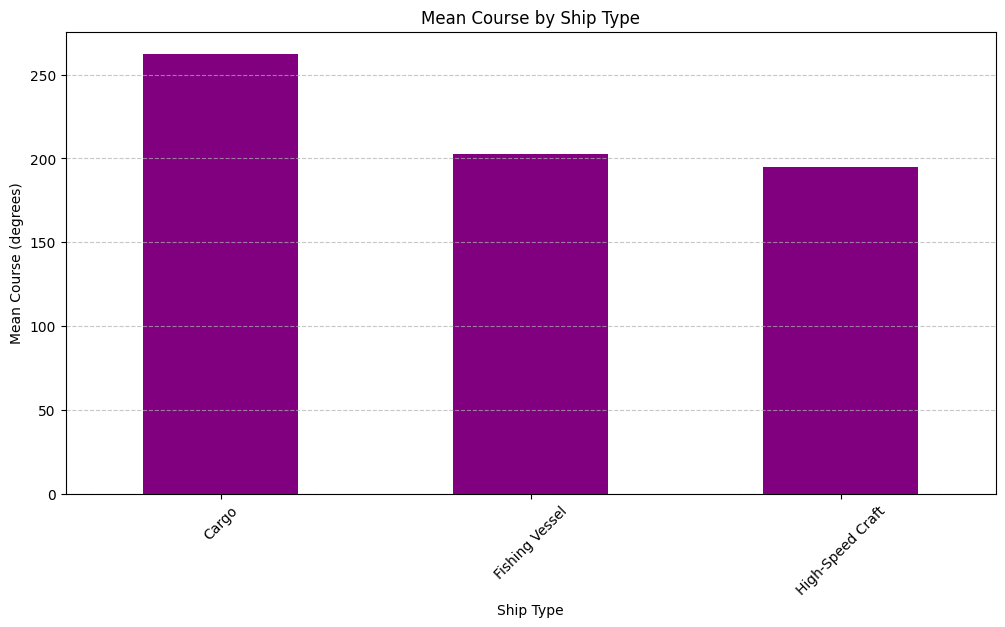

In [41]:
# Plotting the bar chart for mean course by ship type
plt.figure(figsize=(12, 6))  # Set the figure size (width, height)
mean_course_by_type.plot(kind='bar', color='purple')  # Plotting the bar chart
plt.title('Mean Course by Ship Type')  # Adding title to the plot
plt.xlabel('Ship Type')  # Adding label to the x-axis
plt.ylabel('Mean Course (degrees)')  # Adding label to the y-axis
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines
plt.show()  # Display the plot


In [42]:
# Debug step: Print the column names
print("Column names:", df.columns)

Column names: Index(['created_at', 'timestamp', 'static_updated_at', 'position_updated_at',
       'mmsi', 'latitude', 'longitude', 'speed', 'course', 'heading', 'imo',
       'name', 'call_sign', 'flag', 'draught', 'ship_type_code', 'ship_type',
       'length', 'width', 'eta', 'destination', 'status', 'collection_type'],
      dtype='object')


/var/folders/zk/rs9ym1ps2218f736g3l9fb9w0000gn/T/ipykernel_18935/40309419.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vessel_counts.index, y=vessel_counts.values, palette='viridis')


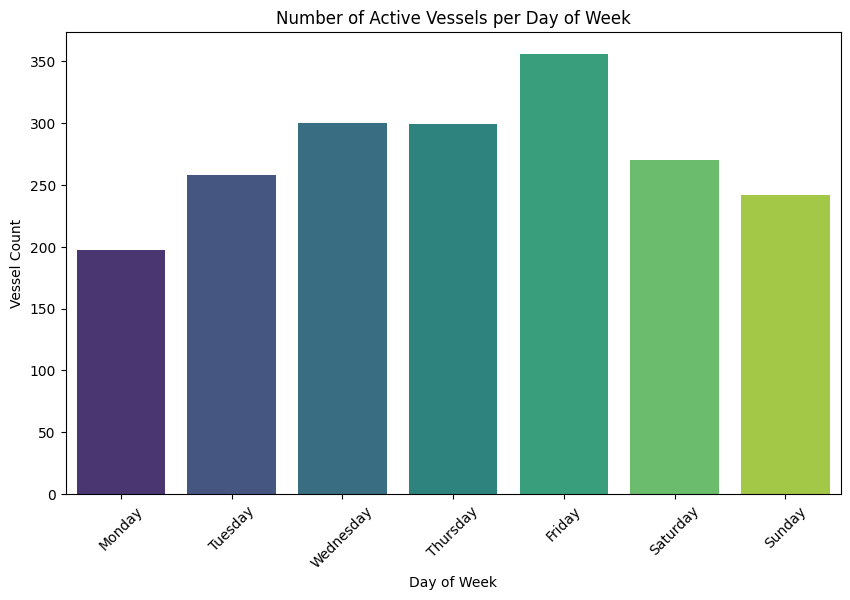

In [43]:



# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract day of the week
df['day_of_week'] = df['timestamp'].dt.day_name()

# Count unique vessels per day of the week
vessel_counts = df.groupby('day_of_week')['mmsi'].nunique().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=vessel_counts.index, y=vessel_counts.values, palette='viridis')
plt.xlabel('Day of Week')
plt.ylabel('Vessel Count')
plt.title('Number of Active Vessels per Day of Week')
plt.xticks(rotation=45)
plt.show()

/var/folders/zk/rs9ym1ps2218f736g3l9fb9w0000gn/T/ipykernel_18935/2464939843.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_speed['day_of_week'] = df_high_speed['timestamp'].dt.day_name()
/var/folders/zk/rs9ym1ps2218f736g3l9fb9w0000gn/T/ipykernel_18935/2464939843.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vessel_counts.index, y=vessel_counts.values, palette='viridis')


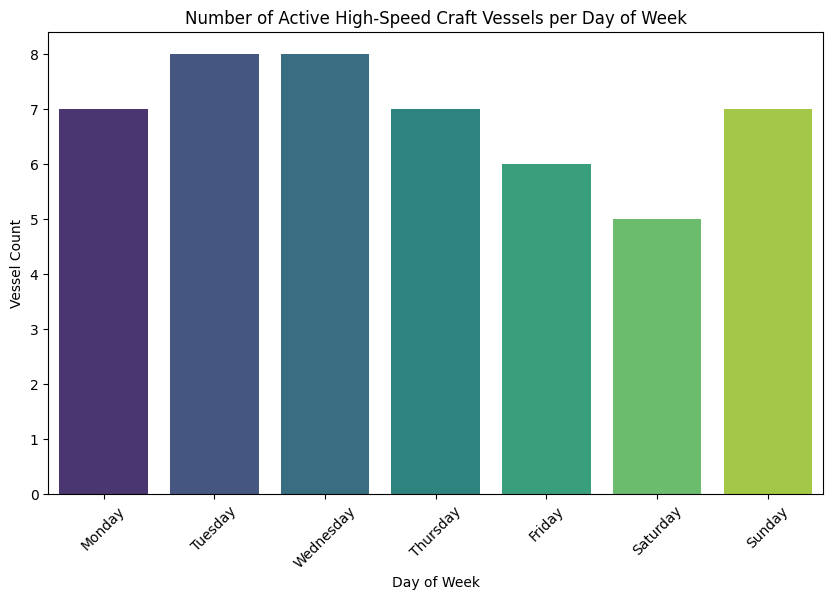

In [44]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter for 'High-Speed Craft'
df_high_speed = df[df['ship_type'] == 'High-Speed Craft']

# Extract day of the week
df_high_speed['day_of_week'] = df_high_speed['timestamp'].dt.day_name()

# Count unique vessels per day of the week
vessel_counts = df_high_speed.groupby('day_of_week')['mmsi'].nunique().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=vessel_counts.index, y=vessel_counts.values, palette='viridis')
plt.xlabel('Day of Week')
plt.ylabel('Vessel Count')
plt.title('Number of Active High-Speed Craft Vessels per Day of Week')
plt.xticks(rotation=45)
plt.show()